### K-means Clustering (K-평균 군집 분석)
- 데이터를 K개의 Cluster(군집)으로 묶는 알고리즘으로서 각 군집의 평균을 활용하여 K개의 군집으로 묶는다.
- 비슷한 특성을 지닌 데이터들끼리 묶어 K개의 군집으로 군집화하는 대표적인 군집화 기법이며, 거리를 기반으로 군집화한다.
- 각 집합별 중심점에서 집합 내 오브젝트간 거리의 제곱합을 최소로 하는 집합 S를 찾는 것이 K-Means 알고리즘의 목표이다.
> 1. 초기 k "평균값" (위의 경우 k=3) 은 데이터 오브젝트 중에서 무작위로 뽑힌다.
<img src="./images/k_means01.png" width="300" style="margin-left: 0; margin-bottom: 20px">
> 2. k 각 데이터 오브젝트들은 가장 가까이 있는 평균값을 기준으로 묶인다.
<img src="./images/k_means02.png" width="300" style="margin-left: 0; margin-bottom: 20px">
> 3. k개의 클러스터의 중심점을 기준으로 평균값이 재조정된다.
<img src="./images/k_means03.png" width="300" style="margin-left: 0; margin-bottom: 20px">
> 4. 수렴할 때까지 2, 3 과정을 반복한다.
<img src="./images/k_means04.png" width="300" style="margin-left: 0; margin-bottom: 20px">
> 5. 결과
<img src="./images/k_means05.gif" width="500" style="margin-left: -40px">

##### 국가별 요소 분석을 통한 NGO 지원 순위 지정
국제인도주의 NGO는 약 1,000만 달러를 모금했습니다.  
이제 NGO의 CEO는 이 돈을 어떻게 전략적이고 효과적으로 사용할 것인지 결정해야 합니다.  
우리의 업무는 데이터 분석가로서 국가의 전반적인 발전을 결정하는 사회경제적, 건강적 요소들을 사용하여 국가들을 분류하는 것입니다.  
이 분석 이후에 우리는 CEO가 중점을 두고 가장 높은 우선순위를 두어야 할 국가들을 제안해야 합니다.

- country: 국가명
- child_mort: 출생아 수 1000명당 5세 미만 아동 사망률
- exports: 상품 및 서비스의 수출 전체 GDP의 %로 부여되는 상품 및 서비스의 수출
- health: 총 GDP 대비 총 보건 지출 비율(%)
- imports: 상품 및 서비스 수입액(총 GDP의 %)
- income: 1인당 순이익
- inflation: 총 GDP의 연간 성장률 측정
- life_expec: 현재의 사망률 패턴을 그대로 유지할 경우 신생아가 살 수 있는 평균 연수
- total_fer: 현재의 연령-출산율이 동일한 경우 각 여성이 낳은 자녀의 수
- gdpp: 1인당 GDP

In [1]:
import pandas as pd

country_df = pd.read_csv('./datasets/country.csv')
country_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [2]:
country_df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [3]:
country_df.duplicated().sum()

0

In [4]:
country_df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [5]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
country_df.country.value_counts().count()

167

<Axes: xlabel='country'>

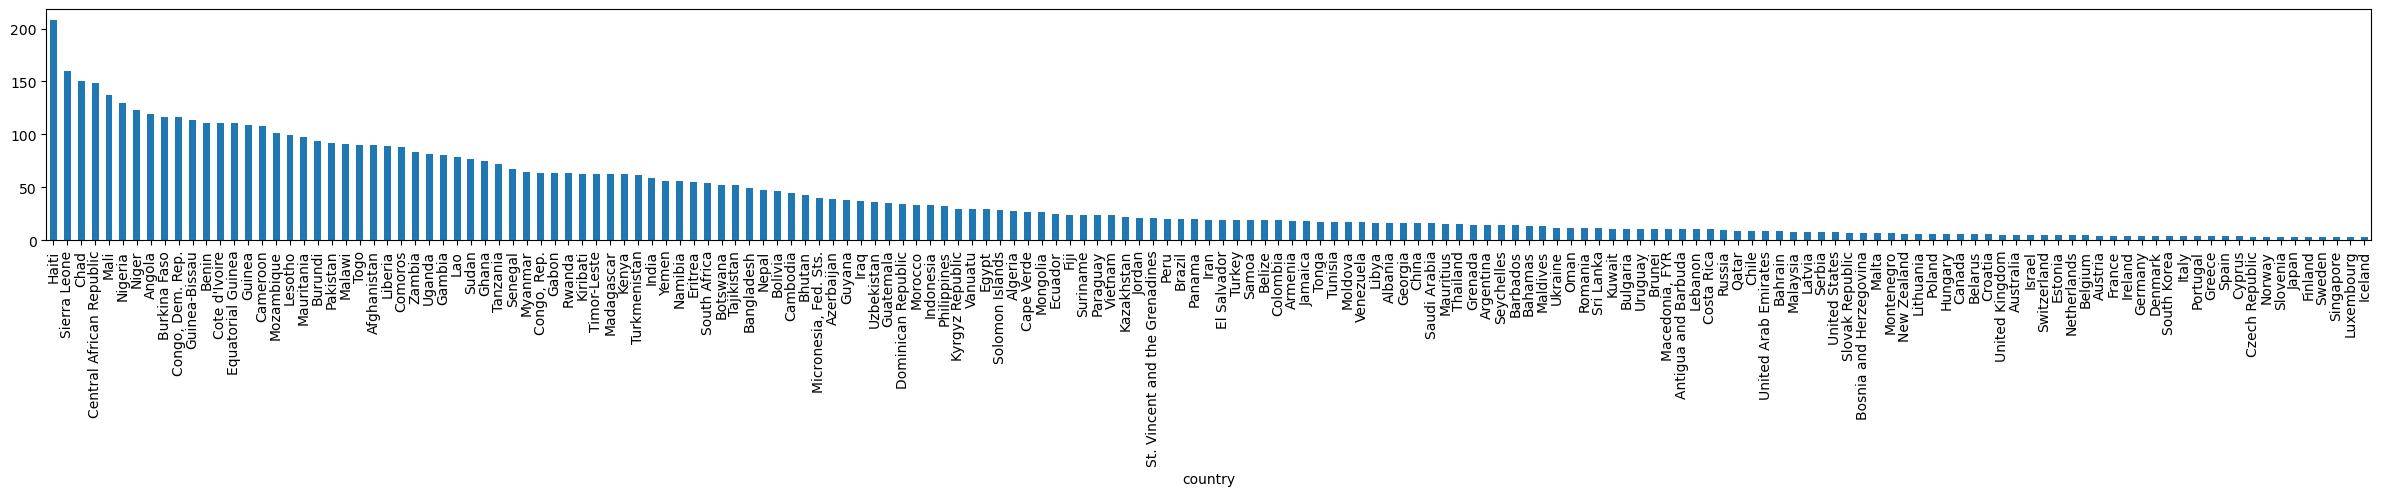

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 3))
country_df.groupby('country')['child_mort'].mean().sort_values(ascending=False).plot(kind='bar')

<div style="width:3000px">
    <img src="./images/country_df01.png">
<div>

<Axes: xlabel='total_fer', ylabel='child_mort'>

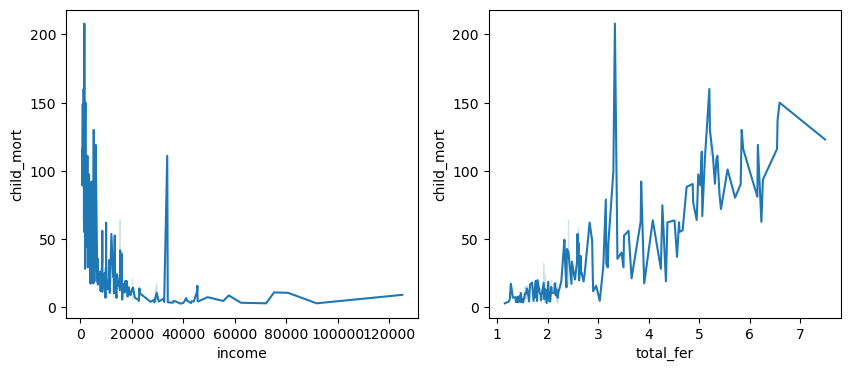

In [10]:
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.lineplot(x=country_df['income'], y=country_df['child_mort'], ax=ax[0])
sns.lineplot(x=country_df['total_fer'], y=country_df['child_mort'], ax=ax[1])

In [11]:
from sklearn.preprocessing import StandardScaler

scaled_country_df = pd.DataFrame()

scaler = StandardScaler()
columns = ['child_mort', 'health', 'income', 'life_expec', 'total_fer']
scaled_country_df[columns] = scaler.fit_transform(country_df[columns])

In [13]:
scaled_country_df['country'] = country_df.country
scaled_country_df

,child_mort,health,income,life_expec,total_fer,country
0,1.291532,0.279088,-0.808245,-1.619092,1.902882,Afghanistan
1,-0.538949,-0.097016,-0.375369,0.647866,-0.859973,Albania
2,-0.272833,-0.966073,-0.220844,0.670423,-0.038404,Algeria
3,2.007808,-1.448071,-0.585043,-1.179234,2.128151,Angola
4,-0.695634,-0.286894,0.101732,0.704258,-0.541946,Antigua and Barbuda
...,...,...,...,...,...,...
162,-0.225578,-0.571711,-0.738527,-0.852161,0.365754,Vanuatu
163,-0.526514,-0.695862,-0.033542,0.546361,-0.316678,Venezuela
164,-0.372315,0.008877,-0.658404,0.286958,-0.661206,Vietnam
165,0.448417,-0.597272,-0.658924,-0.344633,1.140944,Yemen


In [15]:
# conda install -c plotly plotly_express
import plotly_express as px

custom_colors = ['#FFA500', '#A32EFF', '#73D393', '#6988E7']

cluster_data = pd.DataFrame({'country': scaled_country_df['country'],
                             'child_mort': scaled_country_df['child_mort']})

# Creating the choropleth map
fig = px.choropleth(data_frame=cluster_data,
                    locations='country',
                    locationmode='country names', 
                    color='child_mort', 
                    color_continuous_scale=custom_colors, 
                    range_color=[0, 3])

# Updating the layout to include a title
fig.update_layout(title='Countries clustered by priority')

# Showing the plot
fig.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
scaled_country_df['country'] = encoder.fit_transform(scaled_country_df['country'])
print(encoder.classes_)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

In [17]:
scaled_country_df

,child_mort,health,income,life_expec,total_fer,country
0,1.291532,0.279088,-0.808245,-1.619092,1.902882,0
1,-0.538949,-0.097016,-0.375369,0.647866,-0.859973,1
2,-0.272833,-0.966073,-0.220844,0.670423,-0.038404,2
3,2.007808,-1.448071,-0.585043,-1.179234,2.128151,3
4,-0.695634,-0.286894,0.101732,0.704258,-0.541946,4
...,...,...,...,...,...,...
162,-0.225578,-0.571711,-0.738527,-0.852161,0.365754,162
163,-0.526514,-0.695862,-0.033542,0.546361,-0.316678,163
164,-0.372315,0.008877,-0.658404,0.286958,-0.661206,164
165,0.448417,-0.597272,-0.658924,-0.344633,1.140944,165


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_country_df.drop(columns='country', axis=1))

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.631476   0.18746992]
0.8189459186596405


In [19]:
pca_columns=[f'pca{i+1}' for i in range(2)]
pca_df = pd.DataFrame(pca_df, columns=pca_columns)
pca_df.head(10)

,pca1,pca2
0,2.768235,0.729036
1,-0.888755,-0.191291
2,-0.261631,-0.992235
3,3.232455,-0.959806
4,-1.001876,-0.437322
5,-0.927986,0.335342
6,-0.476124,-0.910902
7,-2.086252,0.312837
8,-2.346238,1.104459
9,-0.161462,-0.359605


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Program

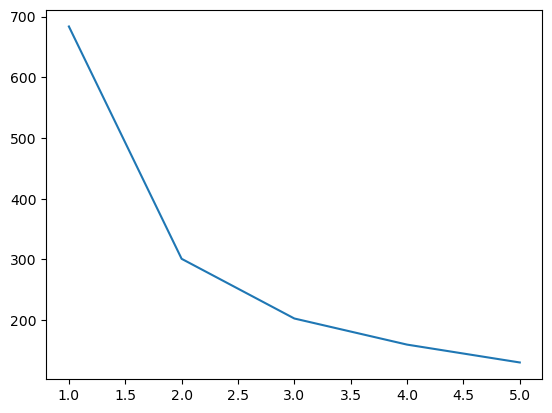

In [20]:
from sklearn.cluster import KMeans

# k 개수
x = []

# 응집도
y = []

for k in range(1, 6):
    k_means = KMeans(n_clusters=k, random_state=124)
    k_means.fit(pca_df)
    
    x.append(k)
    y.append(k_means.inertia_)
    
plt.plot(x, y)

In [21]:
k_means = KMeans(n_clusters=3, random_state=124)
k_means.fit_predict(pca_df)
pca_df['cluster'] = k_means.labels_
pca_df

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



,pca1,pca2,cluster
0,2.768235,0.729036,0
1,-0.888755,-0.191291,1
2,-0.261631,-0.992235,1
3,3.232455,-0.959806,0
4,-1.001876,-0.437322,1
...,...,...,...
162,0.908790,-0.393255,1
163,-0.591992,-0.781283,1
164,-0.414806,0.003518,1
165,1.359524,-0.361734,0


<Axes: xlabel='pca1', ylabel='pca2'>

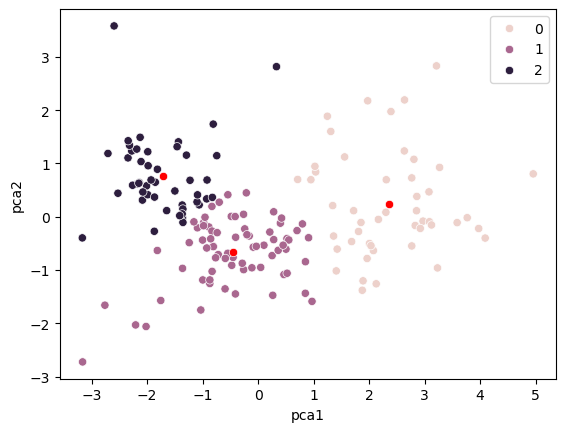

In [22]:
centroids = k_means.cluster_centers_

centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df)
sns.scatterplot(x=centroids_x, y=centroids_y, color='red')

In [24]:
pca_df['country'] = scaled_country_df.country
pca_df.groupby(by='cluster')['country'].count()

cluster
0    48
1    72
2    47
Name: country, dtype: int64

In [25]:
country_df['cluster'] = pca_df.cluster
country_df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


<Axes: xlabel='income'>

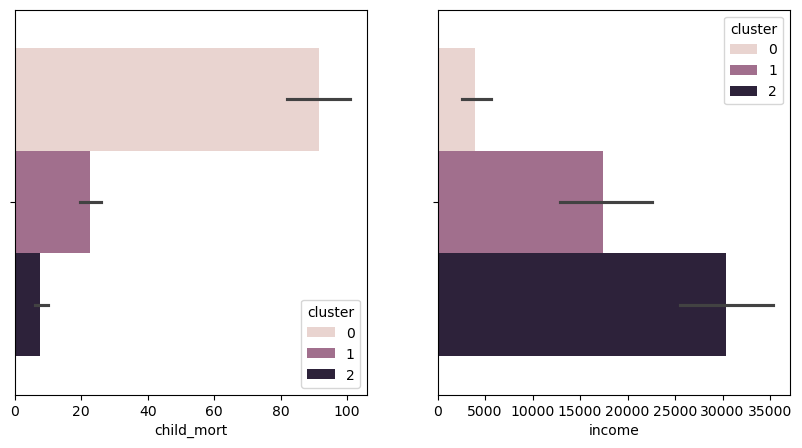

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x='child_mort', hue='cluster', data=country_df, ax=ax[0])
sns.barplot(x='income', hue='cluster', data=country_df, ax=ax[1])

In [29]:
country_df[country_df.cluster == 0].country

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     